In [ ]:
#To avoid showing any warnings
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1, 'Salary v/s Job Experience')

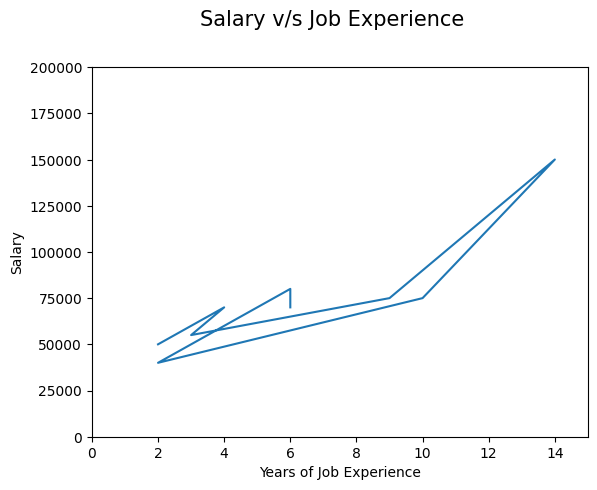

In [2]:
import matplotlib.pyplot as plt
Exp= [2,4,3,9,12,14,10,2,6,6]
Salary=[50000,70000,55000,75000,120000,150000,75000,40000,80000,70000]
plt.plot(Exp,Salary)
plt.xlabel('Years of Job Experience')
plt.ylabel('Salary')
plt.xlim(0,15)
plt.ylim(0,200000)
plt.suptitle('Salary v/s Job Experience', y=1, size=15)

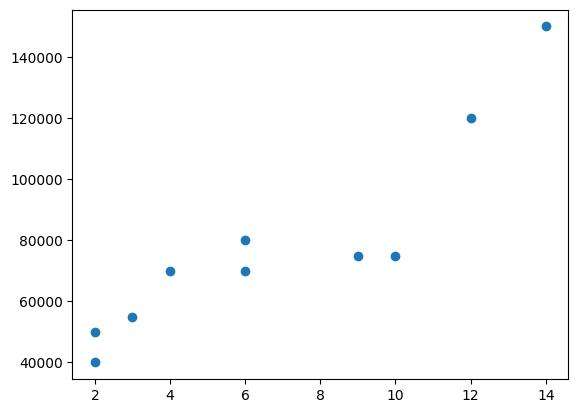

In [3]:
plt.scatter(Exp,Salary)

# Import Data Set

In [4]:
from google.colab import files
uploaded=files.upload()

Saving NewspaperData.csv to NewspaperData.csv


In [5]:
import pandas as pd
newspaper = pd.read_csv("NewspaperData.csv")
newspaper.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [ ]:
newspaper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


<Axes: xlabel='daily', ylabel='sunday'>

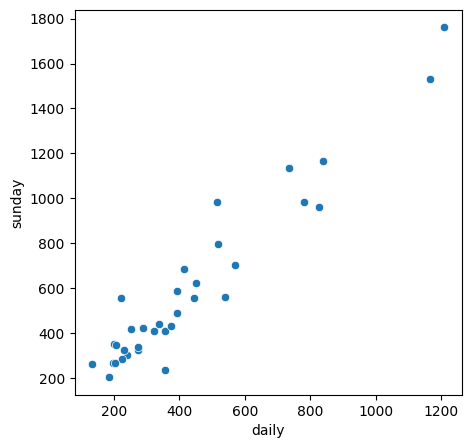

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'daily',y = 'sunday',data = newspaper,palette = 'Set1')

# Correlation

-1...........-0.5...........0...........+0.5...........+1

In [ ]:
newspaper.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<Axes: xlabel='daily', ylabel='Density'>

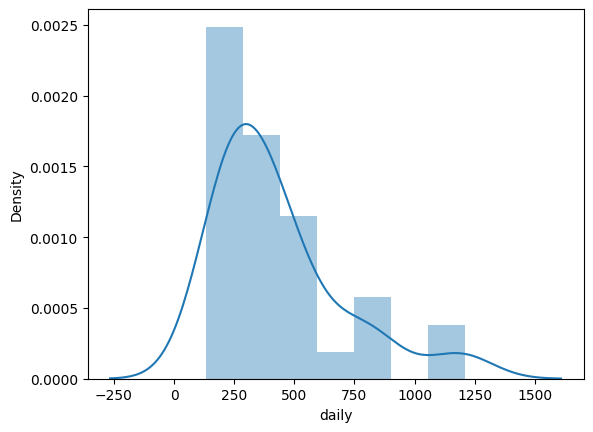

In [ ]:
import seaborn as sns
sns.distplot(newspaper['daily'])

<Axes: xlabel='sunday', ylabel='Density'>

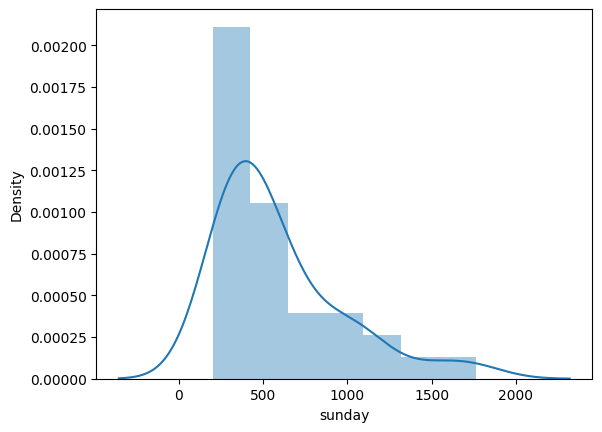

In [ ]:
import seaborn as sns
sns.distplot(newspaper['sunday'])

Fitting a Linear Regression Model

In [6]:
import statsmodels.formula.api as smf

In [8]:
#OLS=Ordinary Least Squares
model = smf.ols("sunday~daily",data = newspaper).fit()

<Axes: xlabel='daily', ylabel='sunday'>

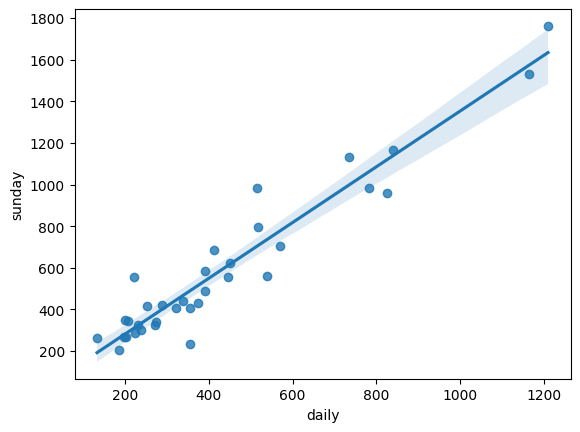

In [9]:
import seaborn as sns
#To see the best fit line (which is as close as possible to as many points as possible)

sns.regplot(x="daily", y="sunday", data=newspaper)

In [10]:
#Coefficients
model.params

#Interpretation for Beta Coefficient of Daily
#For every unit increase in the Daily Circulation value, the value for Sunday Circulation will increase by 1.339715

Intercept    13.835630
daily         1.339715
dtype: float64

In [ ]:
# y = mx + c

#Y =    B0     +  B1    *  X1
#Y = 13.835630 + 1.339715 * Daily

In [ ]:
newspaper.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


# y = B0 + B1*X1 + e

# y = c  +  m*x

In [11]:
newspaper[:3]

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084


In [ ]:
13.835630 + (1.339715*391.952)

538.93960368

In [ ]:
13.835630 + (1.339715*516.981)

706.442830415

In [ ]:
#To see the model predictions
model.fittedvalues

0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

# y = B0 + B1*X1 + e

## B0 - Intercept
## B1 - Slope
## X1 - Independent data point
## e (error) - Vertical distance between the actual 'Sunday' value & the Sunday fitted value

In [ ]:
newspaper['Predicted']=model.fittedvalues
newspaper[0:5]

,Newspaper,daily,sunday,Predicted1,Predicted
0,Baltimore Sun,391.952,488.506,538.939604,538.939509
1,Boston Globe,516.981,798.298,706.442830,706.442705
2,Boston Herald,355.628,235.084,490.275796,490.275710
3,Charlotte Observer,238.555,299.451,333.431342,333.431284
4,Chicago Sun Times,537.780,559.093,734.307563,734.307432


In [ ]:
#For Manual Calculations
newspaper['Predicted1']=13.835630 + (1.339715 * newspaper['daily'])
newspaper[0:5]

,Newspaper,daily,sunday,Predicted1
0,Baltimore Sun,391.952,488.506,538.939604
1,Boston Globe,516.981,798.298,706.442830
2,Boston Herald,355.628,235.084,490.275796
3,Charlotte Observer,238.555,299.451,333.431342
4,Chicago Sun Times,537.780,559.093,734.307563


In [ ]:
#To generate the residual values
#Difference between Actual & Fitted Values
newspaper['Error']=model.resid
newspaper[0:5]

,Newspaper,daily,sunday,Predicted1,Predicted,Error
0,Baltimore Sun,391.952,488.506,538.939604,538.939509,-50.433509
1,Boston Globe,516.981,798.298,706.442830,706.442705,91.855295
2,Boston Herald,355.628,235.084,490.275796,490.275710,-255.191710
3,Charlotte Observer,238.555,299.451,333.431342,333.431284,-33.980284
4,Chicago Sun Times,537.780,559.093,734.307563,734.307432,-175.214432


In [ ]:
newspaper['Error1']=newspaper['sunday'] - newspaper['Predicted']
newspaper[0:5]

,Newspaper,daily,sunday,Predicted,Predicted1,Error,Error1
0,Baltimore Sun,391.952,488.506,538.939509,538.939604,-50.433509,-50.433509
1,Boston Globe,516.981,798.298,706.442705,706.442830,91.855295,91.855295
2,Boston Herald,355.628,235.084,490.275710,490.275796,-255.191710,-255.191710
3,Charlotte Observer,238.555,299.451,333.431284,333.431342,-33.980284,-33.980284
4,Chicago Sun Times,537.780,559.093,734.307432,734.307563,-175.214432,-175.214432


In [ ]:
newspaper['Error_Sq']=(newspaper['Error'])**2
newspaper[0:5]

,Newspaper,daily,sunday,Predicted1,Predicted,Error,Error_Sq
0,Baltimore Sun,391.952,488.506,538.939604,538.939509,-50.433509,2543.538791
1,Boston Globe,516.981,798.298,706.442830,706.442705,91.855295,8437.395210
2,Boston Herald,355.628,235.084,490.275796,490.275710,-255.191710,65122.808728
3,Charlotte Observer,238.555,299.451,333.431342,333.431284,-33.980284,1154.659696
4,Chicago Sun Times,537.780,559.093,734.307563,734.307432,-175.214432,30700.097285


In [ ]:
#Y = B0 + B1*X + e
#c=13.835630
#m=1.339715
newspaper['Y']= 13.835630 + (1.339715 * newspaper['daily']) + newspaper['Error']
newspaper[0:5]

In [ ]:
Mean_Squared_Error=newspaper['Error_Sq'].mean()
Mean_Squared_Error

11268.692072241502

In [ ]:
model.rsquared
#91.8% of variation in the dependent variable is explained by the given independent variable

0.9180596895873295

In [ ]:
#Null Hypothesis - Daily Edition Data doesn't affect the Sunday edition significantly.
#Alternate Hypothesis - Daily Edition Data significantly affects the Sunday Edition.

#Since p-value is less then 0.05 for 'Daily' variable,
#We can say that it is a significant variable in predicting the dependent variable 'Sunday'
model.pvalues

0.00000000000000000006016802

# Predict for new data point

In [16]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300,215,326,412])
newdata

0    200
1    300
2    215
3    326
4    412
dtype: int64

In [17]:
newsp=pd.DataFrame(newdata,columns=['daily'])
newsp

,daily
0,200
1,300
2,215
3,326
4,412


In [18]:
model.predict(newsp)

0    281.778581
1    415.750057
2    301.874303
3    450.582641
4    565.798110
dtype: float64

In [12]:
13.835630+(1.339715*200)

281.77862999999996

In [13]:
13.835630+(1.339715*300)

415.75012999999996

In [19]:
newsp['predicted']=model.predict(newsp)
newsp

,daily,predicted
0,200,281.778581
1,300,415.750057
2,215,301.874303
3,326,450.582641
4,412,565.798110


In [ ]:
from google.colab import files
uploaded=files.upload()
import pandas as pd
newspaper = pd.read_csv("NewspaperData.csv")
newspaper.head()

In [ ]:
import statsmodels.formula.api as smf
#OLS=Ordinary Least Squares
model = smf.ols("sunday~daily",data = newspaper).fit()
newspaper['Predicted']=model.fittedvalues
newspaper['Error']=model.resid
import numpy as np
newspaper['Error_Abs']=np.abs(newspaper['Error'])
MAE_Model = np.mean(newspaper['Error_Abs'])
MAE_Model

In [ ]:
newspaper['Baseline_Predictions']=np.median(newspaper['sunday'])
newspaper['Baseline_Errors']=newspaper['sunday'] - newspaper['Baseline_Predictions']
newspaper['Abs_Baseline_Errors']=np.abs(newspaper['Baseline_Errors'])
MAE_Baseline=np.mean(newspaper['Abs_Baseline_Errors'])
MAE_Baseline

In [ ]:
PPS_Ind_Var= 1-(MAE_Model/MAE_Baseline)
PPS_Ind_Var